In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output


plt.style.use('ggplot')

---

In [2]:
def plot_1d_fuction(xs: list, ys: list, title: str, figsize=(15, 5)):
    
    '''
    
    xs – значения функции по x
    ys – значения функции по y
    
    title – заголовок картинки
    msg – информация для отображения на картинке
    
    figsize – размер картинки
    
    '''
    
    plt.figure(figsize=figsize)
    plt.plot(xs, ys, 'b')
    plt.title(title)
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')

In [3]:
def plot_line_with_x(xs: list, ys: list, x: float, fx: float, title: str, msg='', figsize=(15, 5)):
    
    '''
    
    xs – значения функции по x
    ys – значения функции по y
    
    x – текущее положение точки по x
    fx – текущее положение точки по y
    
    title – заголовок картинки
    msg – информация для отображения на картинке
    
    figsize – размер картинки
    '''
    
    clear_output(True)
    plt.figure(figsize=figsize)
    plt.plot(xs, ys, 'b')
    plt.scatter([x], [fx], c='r', marker='x', s=120)
    
    plt.title(title)
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.text(s=msg, x=-2, y=103)
    plt.show()

In [4]:
def f_1d(x):
    return (x ** 6) + 3 * (x ** 5) - 15 * (x ** 3) - 24 * (x ** 2) + 15 * x - 10

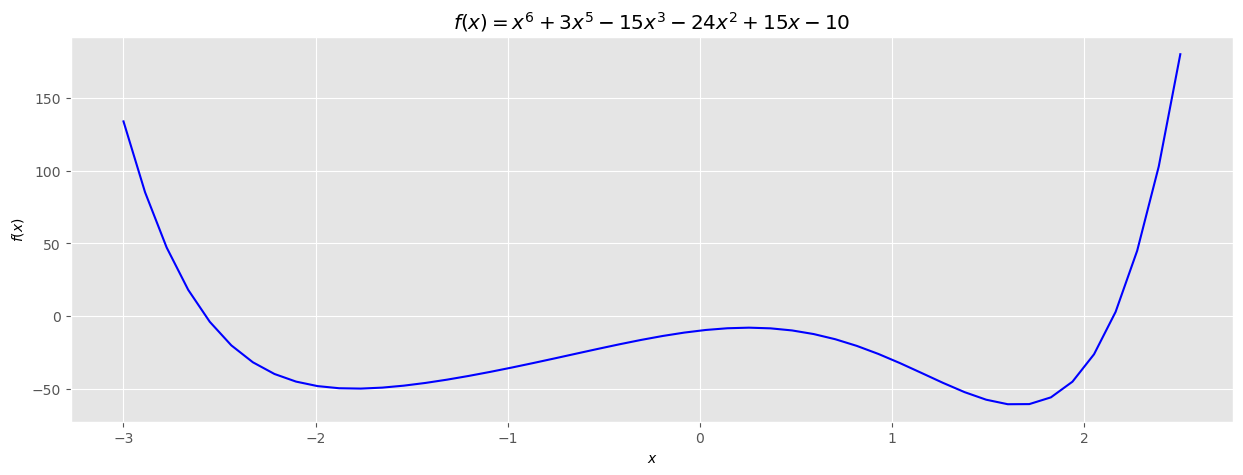

In [5]:
title_f_1d = '$f(x) = x^{6} + 3x^{5} - 15x^{3} - 24x^{2} + 15x - 10$'

xs = np.linspace(-3, 2.5)
ys = f_1d(xs)

plot_1d_fuction(xs, ys, title=title_f_1d)

---

In [6]:
def grad(x):
    return 6 * (x ** 5) + 15 * (x ** 4) - 45 * (x ** 2) - 48 * x + 15

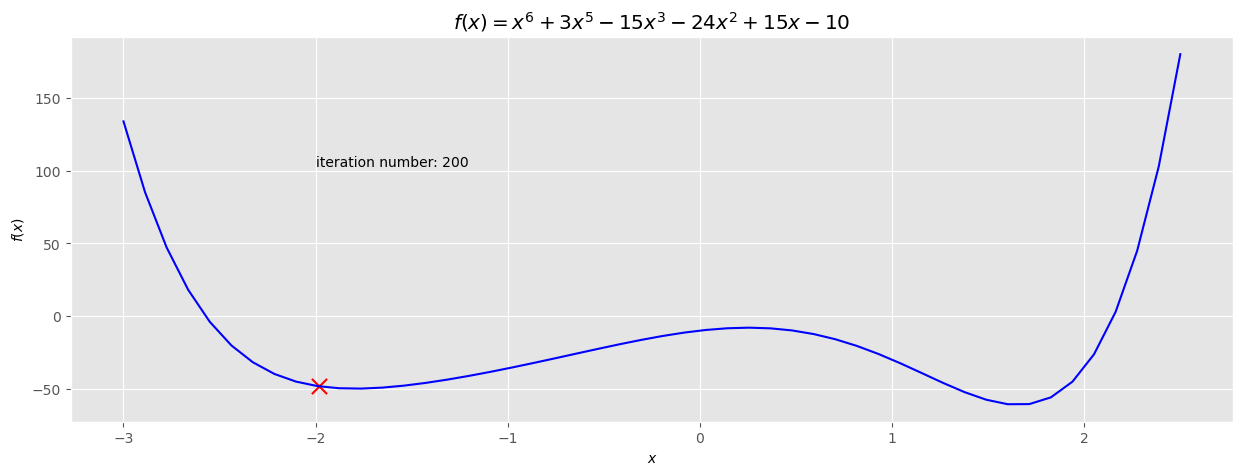

In [7]:
alpha = 0.03
tol = 1e-4

x = 0.2

max_iteration = 200
iteration = 0

dfdx = np.inf

 
while iteration < max_iteration and abs(dfdx) > tol:
    
    iteration += 1
    plot_line_with_x(xs, ys, x, f_1d(x), msg=f'iteration number: {iteration}', title=title_f_1d)
    
    dfdx = grad(x)
    x = x - alpha * dfdx

При x_0 = -3.5 градиент будет сильно возрастать, чтобы решить эту проблему, надо ограничивать его.

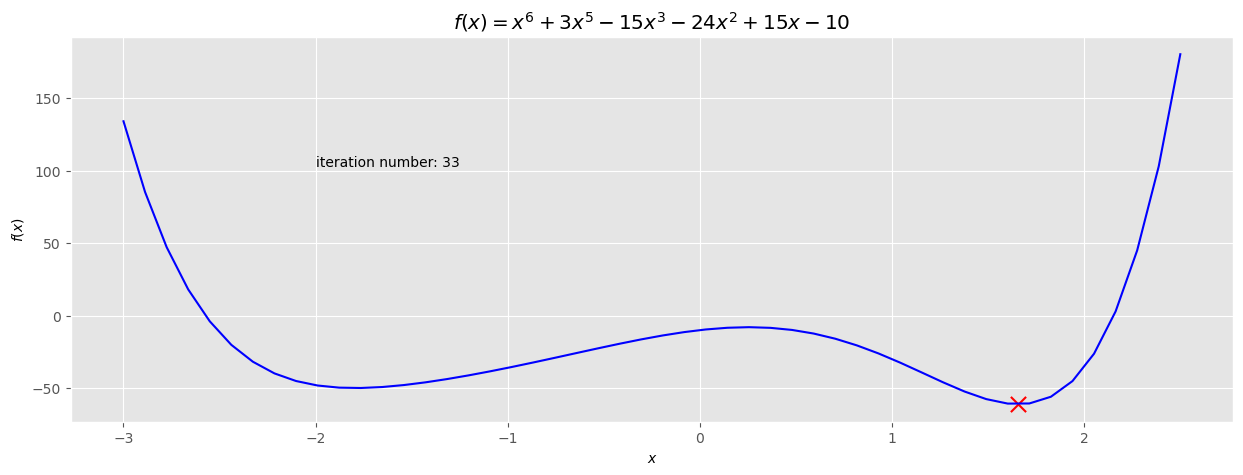

In [8]:
alpha = 0.003
tol = 1e-4

x = 2.5

max_iteration = 200
iteration = 0

dfdx = np.inf


while iteration < max_iteration and abs(dfdx) > tol:
    
    iteration += 1
    plot_line_with_x(xs, ys, x, f_1d(x), msg=f'iteration number: {iteration}', title=title_f_1d)
    
    dfdx = np.clip(grad(x), -10, 10)
    x = x - alpha * dfdx

---

In [9]:
def plot_2d_function(W, B, J, title, figsize=(12, 8)):
    
    '''
    W – матрица параметров по оси x
    B – матрица параметров по оси y
    J – функция которую мы будем оптимизировать
    
    title – заголовок картинки
    '''
    
    plt.figure(figsize=figsize)
    plt.contourf(W, B, J, levels=25)
    plt.title(title)
    plt.ylabel('$b$')
    plt.xlabel('$W$')

In [10]:
W_RANGE = (-5, 36)  # диапазон значений для параметра w
B_RANGE = (-5, 50)  # диапазон значений для параметра b


def f_2d(w, b):
    
    '''Функцию для получения значений J.'''
    
    return (w - 25) ** 2 + (2 * b - 22) ** 2 + (w - 25) * (2 * b - 22)


def grad_w(w, b):
    
    '''Функцию для получения значений производной функции J по параметру w.'''
    
    return 2 * (w - 25) + 2 * b - 22


def grad_b(w, b):
    
    '''Функцию для получения значений производной функции J по параметру b.'''
    
    return 4 * (2 * b - 22) + 2 * (w - 25)

---

Функция, которая генерирует матрицы значений для параметров w, b, J. 

In [11]:
def get_function_parameter_space(num=100, function=f_2d):
    
    w_grid = np.linspace(W_RANGE[0], W_RANGE[1], num=num)
    b_grid = np.linspace(B_RANGE[0], B_RANGE[1], num=num)

    W, B = np.meshgrid(w_grid, b_grid)
    J = function(W, B)
    
    return W, B, J

In [12]:
def plot_2d_gradient_descent(W, B, J, ws: list, bs: list, title: str, iteration_number: int,
                             figsize=(8, 12), levels=25):

    '''
    
    W – матрица параметров по оси x
    B – матрица параметров по оси y
    J – функция, которую мы будем оптимизировать
    
    ws – список с историей координат точки по оси x
    bs – список с историей координат точки по оси y
    
    title – заголовок картинки
    
    iteration_number – номер итерации
    figsize – размер картинки
    
    levels – количество линий уровня для отображения
    
    '''
    
    clear_output(True)
    fig, ax = plt.subplots(figsize=(12, 8))
    
    fig.set_figheight(figsize[0])
    fig.set_figwidth(figsize[1])

    cs = ax.contourf(W, B, J, levels=levels)
    ax.plot(ws, bs, 'r')

    iteration_msg = f'iteration: {iteration_number}' 
    parameters_msg = f'b: {round(bs[-1], 1)}, w: {round(ws[-1], 1)}'
    
    x_text_loc = W_RANGE[0] + (W_RANGE[1] - W_RANGE[0]) / 10
    y_text_loc = B_RANGE[0] + (B_RANGE[1] - B_RANGE[0]) / 2
    
    plt.text(
        s=iteration_msg + '\n' + parameters_msg,
        c='w', x=x_text_loc, y=y_text_loc
    )
    plt.title(title)
    plt.ylabel('$b$')
    plt.xlabel('$W$')
    
    plt.show()

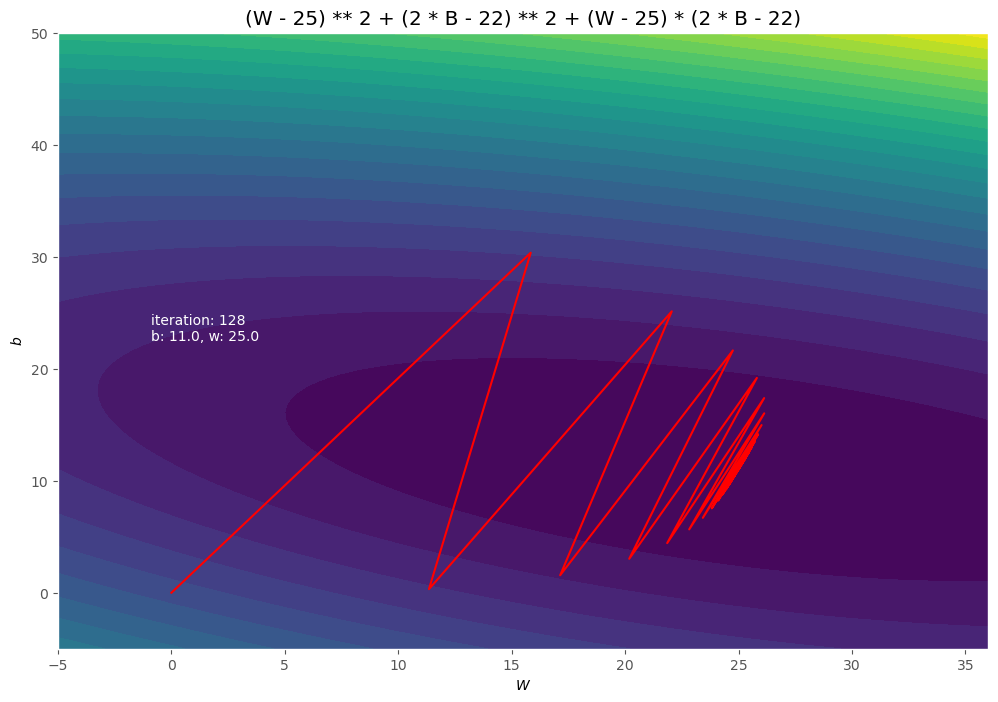

In [13]:
W, B, J = get_function_parameter_space()
title_f_2d = '(W - 25) ** 2 + (2 * B - 22) ** 2 + (W - 25) * (2 * B - 22)'

w, b = 0, 0

ws = [w]
bs = [b]

iteration_number = 0
alpha = 0.22
tol = 1e-4

dJdw, dJdb = np.inf, np.inf

while iteration_number < 200 and np.linalg.norm([dJdw, dJdb]) > tol:
    
    dJdw = 2 * (w - 25) + (2 * b - 22)
    dJdb = 4 * (2 * b - 22) + 2 * (w - 25)

    w = w - alpha * dJdw
    b = b - alpha * dJdb
    
    iteration_number += 1
    
    plot_2d_gradient_descent(W, B, J, ws, bs, title=title_f_2d, iteration_number=iteration_number)
    
    ws.append(w)
    bs.append(b)

Видим большие осцилляции, хотим это исключить добавлением момента.

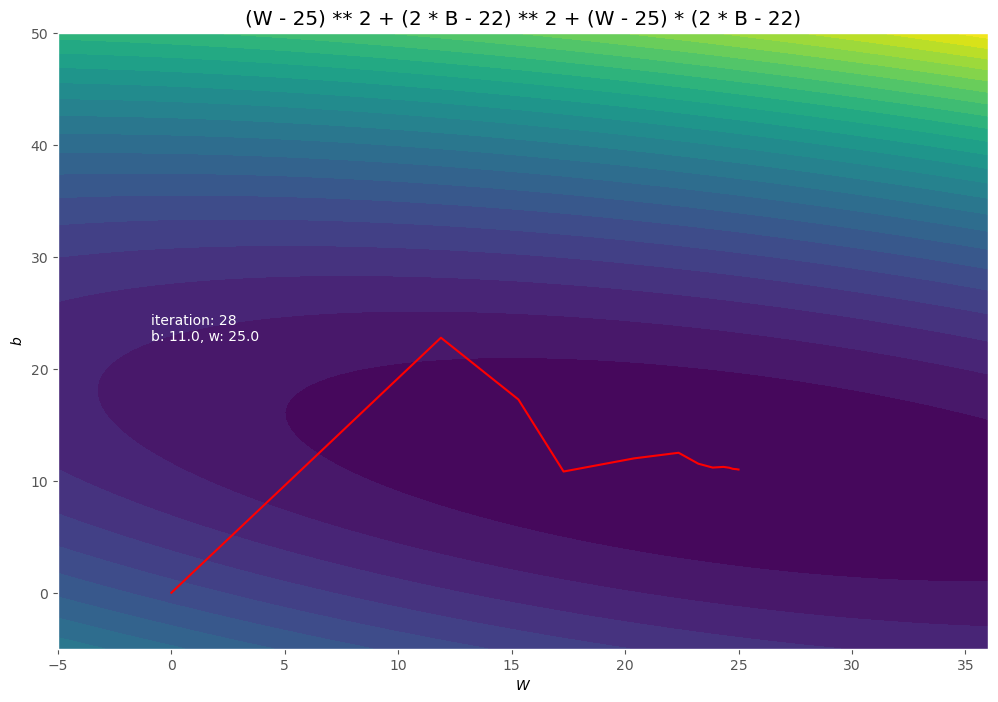

In [14]:
w, b = 0, 0

ws = [w]
bs = [b]

iteration_number = 0
alpha = 0.22
tol = 1e-4

dJdw, dJdb = np.inf, np.inf

v_w, v_b = 0, 0
beta = 0.25

while iteration_number < 200 and np.linalg.norm([dJdw, dJdb]) > tol:
    
    dJdw = 2 * (w - 25) + (2 * b - 22)
    dJdb = 4 * (2 * b - 22) + 2 * (w - 25)
    
    v_w = v_w * beta + dJdw * (1 - beta)
    w = w - alpha * v_w
    
    v_b = v_b * beta + dJdb * (1 - beta)
    b = b - alpha * v_b

    iteration_number += 1
    
    plot_2d_gradient_descent(W, B, J, ws, bs, title=title_f_2d, iteration_number=iteration_number)
    time.sleep(0.1 / iteration_number)
    
    ws.append(w)
    bs.append(b)

Сошлись гораздо быстрее.

---

Для тестирования алгоритмов оптимизации есть [специальные функции](https://en.wikipedia.org/wiki/Test_functions_for_optimization).

---

In [15]:
import torch

def f_1d(x):
    return (x ** 6) + 3 * (x ** 5) - 15 * (x ** 3) - 24 * (x ** 2) + 15 * x - 10

def grad(x):
    return 6 * (x ** 5) + 15 * (x ** 4) - 45 * (x ** 2) - 48 * x + 15


x = torch.tensor(1., requires_grad=True)
y = f_1d(x)

In [16]:
x, y

(tensor(1., requires_grad=True), tensor(-30., grad_fn=<SubBackward0>))

.backward() — функция для расчёта градиента:

In [17]:
y.backward()

После выполнения функции градиент хранится в переменной x: 

In [18]:
x.grad

tensor(-57.)

Проверим, что Pytorch правильно выполнил вычисление градиента с помощью нашей функции:

In [19]:
grad(1)

-57

---